# 4. Portfolio Theory and Its Application in Python
## Abdullah Karasan

The main purpose of portfolio formation is to allocate funds to different financial assets and to try to minimize the risk through diversification or optimization. Portfolio management is a dynamic investment management process that aims to allocate the funds held by the investor to existing financial asset alternatives in such a way to provide the highest return given a certain risk level.

The purpose of portfolio management is to decide which assets to include into the portfolio in the context of the decision maker's attitude towards risk and return and which assets to withdraw from the portfolio depending on the time-varying  conditions. To address this issue, we are about to discuss `Markowitz` Portfolio Theory.

## 4.1. Introduction to Main Concepts for Portfolio Optimization

Managing asset amounts to managing risk but having many assets does not increase the types of risk that investor faces as there are two types of risks, which are `systematic` and `unsystematic`. With that being said, I do not imply that investor's risk level stays the same. In contrast, once investor has many assets, she tends to be more vulnerable to an changes in the source of risk. Let's make it clear.

Now consider we have a bunch of stocks called `portfolio` and each has different susceptibility to risk such as internal weakness, management failure, shock in interest rate, any annoucements and so on. As long as `idiosyncratic` risk affects the stock in our portfolio in a different scale, we can decrease the porfolio risk to a certain level. 

For instance, a new tax imposed on mobile telecomunication might severely affect the stock price of telecom companies but how about the companies operating outside the telecomunication sector? This imposed tax facilitates people to use some internet-based applications like whatsapp, facetime etc. for communication. This, in turn, boosts the stock price of companies selling these apps. 

Thus, if we have more than one stock in our portfolio, we are able to offset the risk. This strategy is refered to as `diversification`. By diversification, we can reduce the risk to a certain level but note that cannot make it completely go away. 

However, if the source of risk is common to all stocks in our portfolio, even diversification cannot help us to eliminate risk. Now, why don't we differentiate risk based on its diversifiability:

* If a risk cannot be eliminated by diversification, it is called unsystematic or idiosyncratic or diversifiable risk. 
* If a risk can be eliminated by diversification, it is called  systematic

In summary, diversification is a way to eliminate risk. At this point, the next question is what is the acceptable risk? We cannot address this question simply by focusing solely on the risk but risk-return relationship can whisper us valuable information.

Intuitively, risk and return is positively related, that is, an increase in risk leads to an increase in return. The more risk an investor can bear, the more likely she gets higher return. So, the return is a function of risk.

Before digging into, let's briefly discuss the main statistics that is used in portfolio optimization:
* Expected portfolio mean
* Portfolio variance
* Portfolio standard deviation

Formula for daily portfolio mean is:

$$
\begin{align}\mu_p&=\mathbb{E}(\sum_i^n w_ir_i)\\
        &=\sum_i^n w_i\mathbb{E}(r_i)\\
        &=\sum_i^n w_i \mu_i\\
        &=w^T\mu\end{align}
$$


To obtain the portfolio standard deviation, we should calculate the variance of a portfolio. The portfolio variance calculation is somewhat different from that of single asset as we are dealing with many asssets, the covariance between them should be taken into account. Let us assume that we have two assets and portfolio return is:

$$ r_p=w_ar_a+w_br_b$$

where $w_a$ and $w_b$ denotes weigths of the corresponding return of stock a and stock b, respectively. If we take the variance of both sides, it turns out:

$$ \sigma^2_p=w_a^2\sigma^2_a+w^2_b\sigma^2_b+2w_aw_b\text{Cov}(r_a,r_b)$$

Taking square root of the variance obtained above gives us the portfolio standard deviation:

$$\sigma_p=\sqrt{\sigma^2_p}$$

In matrix notation:

$$
\begin{align}\sigma^2_p&=\mathbb{E}(r-\mu)^2\\
&=\sum_i^n\sum_j^n w_iw_j \sigma_{ij}\\
&=w^T \Sigma w \end{align}
$$

## 4.2. Markowitz's Portfolio Theory and Application with Python

`Mean-Variance Portfolio Theory` (MPT), proposed by Markowitz, is the main building block of modern portfolio optimization. Markowitz defines return on investment using expected value of its possible returns and he employed variance to reckon risk. At his time around 1950s, this approach was a brand new one since risk was perceived as the likelihood of losses not the volatility of returns. This intuitive idea have made the applicability of mathematical statistic possible in finance.

Thus, the portfolio problem is reduced to as the trade-off problem of between portfolio mean and variance of the assets, and MPT suggests that given the same level of risk low risk should be preferred among fixed risk securities and high expected return and fixed expected return securities.

As much as modern portfolio theory is based on MPT, MPT is also based on diversification to achieve, given a certain level of risk, a minimal portfolio risk or maximal portfolio returns.

Let's now calculate these basic portfolio statistics via real data that we have used in CAPM and APT lesson for an arbitrarily selected time period:

In [1]:
import pandas as pd
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
stocks = ['CMCSA','T','VZ']
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2020,4,4)
stock_data = yf.download(stocks,start=start,end = end, interval='1d')['Close']

[*********************100%***********************]  3 of 3 downloaded


In [3]:
stock_data.head()

,CMCSA,T,VZ
Date,,,
2009-12-31,8.43,28.03,31.07
2010-01-04,8.48,28.58,31.21
2010-01-05,8.37,28.44,31.27
2010-01-06,8.31,27.61,29.94
2010-01-07,8.48,27.30,29.76


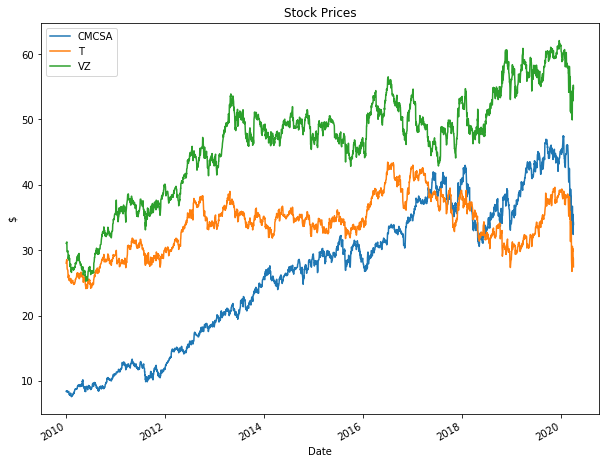

In [4]:
stock_data.plot(figsize=(10,8))
plt.title('Stock Prices')
plt.ylabel('$')
plt.show()

As we use log returns to calculate the mean and variance, we first need to have log returns:

In [5]:
import numpy as np
returns=np.log(stock_data/stock_data.shift(1))

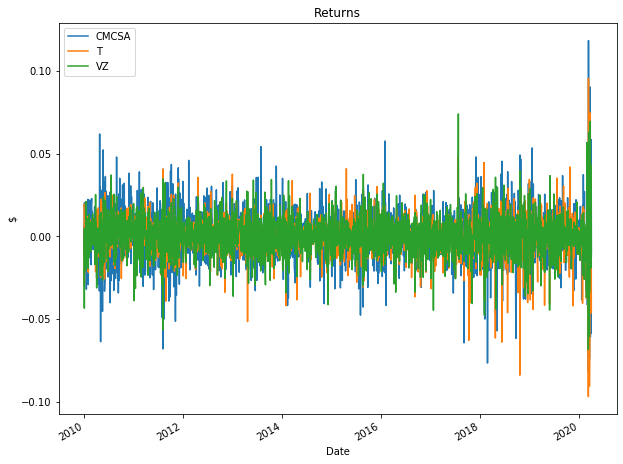

In [6]:
returns.plot(figsize=(10,8))
plt.title('Returns')
plt.ylabel('$')
plt.show()

As we derive the portfolio standard deviation, we see that covariance has an important role. So, we should have it along with the mean of the portfolio:

In [7]:
returns.mean()*252

CMCSA    0.136017
T       -0.002006
VZ       0.055225
dtype: float64

In [8]:
returns.cov()*252

,CMCSA,T,VZ
CMCSA,0.055765,0.022407,0.018689
T,0.022407,0.036284,0.023749
VZ,0.018689,0.023749,0.032001


Let us form our portfolio with random weight between 0 and 1:

In [9]:
weights  = np.random.random(len(stocks))
weights /= np.sum(weights)

In [10]:
weights

array([0.19591822, 0.39112203, 0.41295975])

These weights are attached to related returns to calculate portfolio mean and standard deviation. So, now, we have learned how to derive weight. However, for a given set of securities, investors want to comprehend the risk-return possibilities. To this respect, having one weight per stock is far from being enough to get insight about the risk-return profile of a portfolio. How about applying Monte Carlo simulation?

Monte Carlo allows us to have large numbers of expected returns and expected standard deviations. All we need to do is to repeatedly generate weights and multiply them by mean and covariance matrix:

In [11]:
iterations=1000
def portfolio_frontier(iterations):
    portfolio_exp_means = []
    portfolio_std_devs = []
    all_weights = []
    for i in range (iterations):
        weights = np.random.random(len(stocks))
        weights = weights/np.sum(weights)
        all_weights.append(weights)
        portfolio_exp_means.append(np.sum(returns.mean() * weights) * 252) 
        portfolio_std_devs.append(np.sqrt(np.dot(weights.T,
                                     np.dot(returns.cov() * 252, weights))))
    return portfolio_exp_means, portfolio_std_devs,all_weights

In [12]:
portfolio_exp_means, portfolio_std_devs,all_weights=portfolio_frontier(iterations)

In [13]:
portfolio_returns = np.array(portfolio_exp_means)
portfolio_deviation = np.array(portfolio_std_devs)

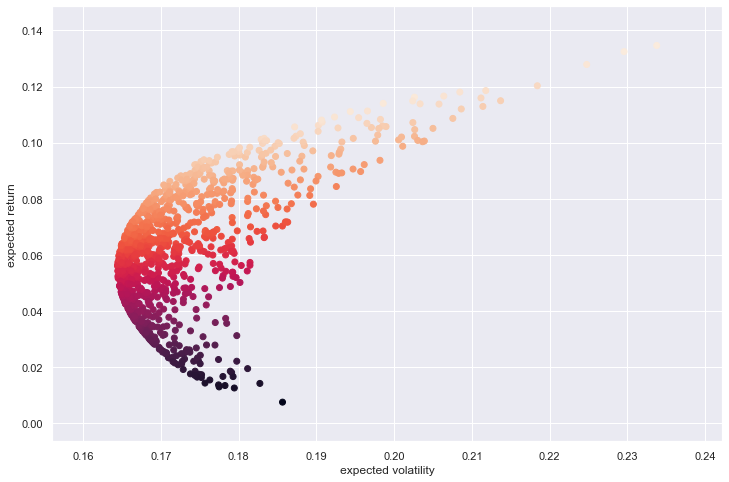

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.set()
plt.scatter(portfolio_deviation, portfolio_returns, c=portfolio_returns / portfolio_deviation, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.show()

We have a nice visualization for sure but how can we know that which point provides best return-risk combination? This is where stock performance ratios come into the play. The most prominent ones are:
* Sharpe Ratio
* Treynor Ratio

`Sharpe` ratio is a method developed to gauge the risk-return combinations. In the numerator of the formula, portfolio return is subtracted from risk free rate and therefore it is known as risk-adjusted method. Shortly, it tells that given the volatility how much extra return investor receives. The formula is as follows:

$$\text{Sharpe ratio}=\frac{r_i-r_f}{\sigma(r_i)}$$

where $r_i$ is the $i^{th}$ stock return (or it can be portfolio return), $r_f$ is the risk free rate and finally $\sigma(r_i)$ is the standard deviation of $i^{th}$ stock. 

`Treynor` ratio, on the other hand, shows given the level of systematic risk, how much return an investor has. The formula of Treynor ratio is:

$$\text{Treynor ratio}=\frac{r_i-r_f}{\beta_i}$$

We will continue with Sharpe ratio. For the sake of simplicity, let us assume that risk free rate is zero and calculate Sharpe ratio:

In [15]:
sharpe= portfolio_returns/portfolio_deviation

In [16]:
print('Maximum Sharpe Ratio is {:.2f}'.format(sharpe.max()))
print('The index of maximum Sharpe Ratio is {:.2f}'.format(sharpe.argmax()))

Maximum Sharpe Ratio is 0.58
The index of maximum Sharpe Ratio is 525.00


In [17]:
df_vol=pd.DataFrame(portfolio_std_devs)
df_means=pd.DataFrame(portfolio_exp_means)
df_sharpe=pd.DataFrame(sharpe)

In [18]:
portfolio=pd.concat([df_vol,df_means,df_sharpe],axis=1)
portfolio.columns=['Volatility','Return','Sharpe']

In [19]:
max_sharpe=portfolio.iloc[portfolio['Sharpe'].idxmax()]
min_sharpe=portfolio.iloc[portfolio['Sharpe'].idxmin()]

In [20]:
max_sharpe

Volatility    0.229581
Return        0.132466
Sharpe        0.576989
Name: 525, dtype: float64

In [21]:
all_weights=portfolio_frontier(iterations)[2]
all_weights=np.array(all_weights)

Now, we can incorporate the Sharpe ratio to the risk-return plot given below as a `colorbar`, which provides us a scale so that we are able to evaluate the portfolio performance:

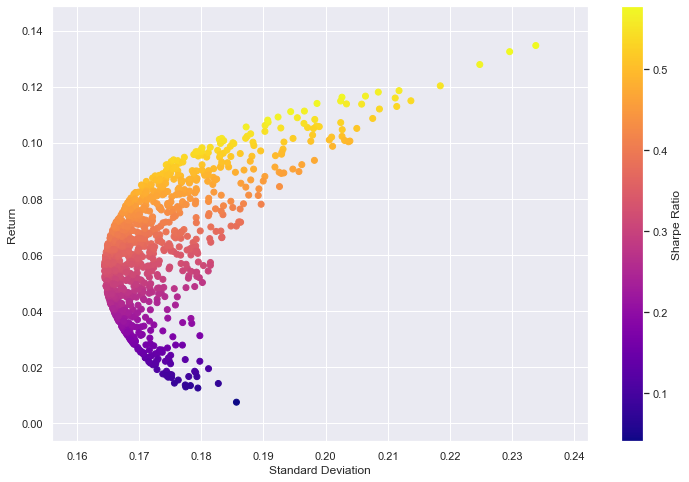

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_deviation,portfolio_returns,c=sharpe,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.show()

Focusing on the Sharpe ratio, we observe that points with yellow colors have higher risk-return combinations. Now, let's locate the index of maximum return and standard deviation or volatility of the portfolio and assign black color, which gives us the optimal risk-return combination:

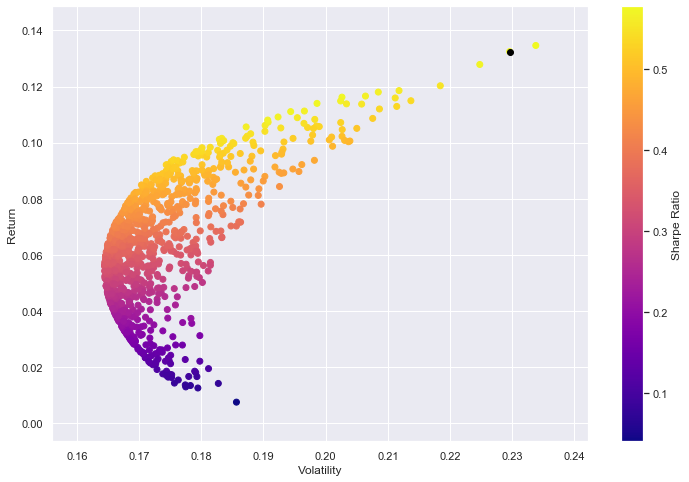

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_deviation,portfolio_returns,c=sharpe,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')


plt.scatter(max_sharpe[0], max_sharpe[1], c='black')
plt.show()

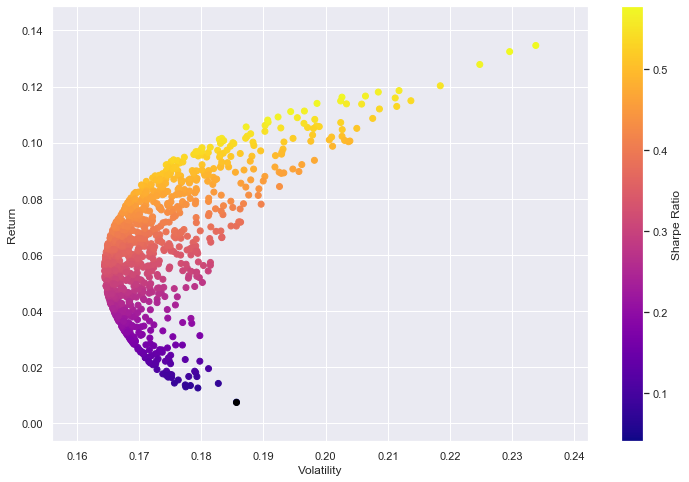

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_deviation,portfolio_returns,c=sharpe,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')


plt.scatter(min_sharpe[0], min_sharpe[1], c='black')
plt.show()

# Conclusion

Risk-return trade-off has been one of the most controversial topics in finance and Markowitz's Portfolio Theorem is one of the early and ground-breaking attempt to tackle this problem. Given the risk level, highest expected return is the optimal choice and to decide best performing stock or portfolio, Sharpe and Treynor ratios are easy-to-implement tools. This lesson tells us to decide which stock or portfolio beats the market and how we can calculate it via Python.